In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 

In [2]:
s_p=['AAPL','MSFT','CAT']

In [3]:
df=yf.download(s_p,start='2020-01-01')['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [4]:
ret_df=df.pct_change()

In [5]:
ret_df

,AAPL,CAT,MSFT
Date,,,
2019-12-31,NaN,NaN,NaN
2020-01-02,0.022816,0.019299,0.018516
2020-01-03,-0.009722,-0.013884,-0.012452
2020-01-06,0.007968,-0.000674,0.002585
2020-01-07,-0.004703,-0.013213,-0.009118
...,...,...,...
2023-08-31,0.001172,-0.004250,-0.003133
2023-09-01,0.008463,0.018212,0.002746
2023-09-05,0.001267,-0.016140,0.014879


In [6]:
ret_df.corr()

,AAPL,CAT,MSFT
AAPL,1.000000,0.377251,0.781591
CAT,0.377251,1.000000,0.368628
MSFT,0.781591,0.368628,1.000000


In [7]:
roll_corr=ret_df.rolling(90).corr()

In [8]:
roll_corr.dropna(inplace=True)

In [9]:
roll_corr

AAPL       CAT      MSFT
Date                                         
2020-05-11 AAPL  1.000000  0.751192  0.931889
           CAT   0.751192  1.000000  0.739541
           MSFT  0.931889  0.739541  1.000000
2020-05-12 AAPL  1.000000  0.750055  0.931520
           CAT   0.750055  1.000000  0.740370
...                   ...       ...       ...
2023-09-06 CAT   0.216110  1.000000  0.200109
           MSFT  0.488162  0.200109  1.000000
2023-09-07 AAPL  1.000000  0.226929  0.477877
           CAT   0.226929  1.000000  0.199244
           MSFT  0.477877  0.199244  1.000000

[2514 rows x 3 columns]

In [10]:
roll_corr['AAPL'].loc[:,'MSFT']

Date
2020-05-11    0.931889
2020-05-12    0.931520
2020-05-13    0.931550
2020-05-14    0.931675
2020-05-15    0.930399
                ...   
2023-08-31    0.474338
2023-09-01    0.466671
2023-09-05    0.532222
2023-09-06    0.488162
2023-09-07    0.477877
Name: AAPL, Length: 838, dtype: float64

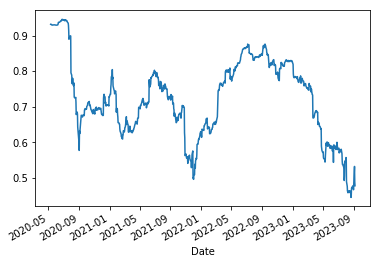

In [11]:
roll_corr['AAPL'].loc[:,'MSFT'].plot()

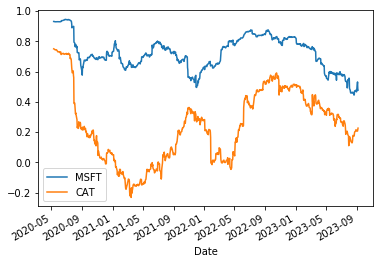

In [12]:
roll_corr.unstack()['AAPL'][['MSFT','CAT']].plot()